# Evolution of COVID in the City of Toronto: Applying ML and NLP models to Classify Infection Classification and Outcome

## Background and Goals

COVID has struck the whole world and more than two years since the onset of the pandemic, its effects are still felt, irrespective of community or region. Canada has been no exception. However, efforts have been put by governments and civil socieity to contain the spread of the virus. Mass vaccination and booster roll-outs have decreased the lethality of the virus. 

In this project, I am going to use the data put forth by the [City of Toronto](https://open.toronto.ca/dataset/covid-19-cases-in-toronto/) on COVID cases to produce two types of classifications tasks. In the first one, I will try to use relevant features to discern between the possible outcomes (fatal, resolved, or active) as well as the whether the cases are outbreak-related or not.

For the second classification task, I will use information regarding source of infection, neighborhood names nad FSA [Forward Sortation Area](https://www.ic.gc.ca/eic/site/bsf-osb.nsf/eng/br03396.html) to classify whether a case is classified as probable or confirmed. Given the textual, string-based nature of the two aforementioned dimensions, I will use a Multinomial Naive-Bayes text categorizer. This might help in mapping out what areas and postal codes have experienced what type of infection episodes.

With that in mind, let's get a look at how the Toronto Public Health services defines the dimensiones of the data set.

#### Column Description
* **_id**

Unique row identifier for Open Data database.

* **Assigned_ID**

A unique ID assigned to cases by Toronto Public Health for the purposes of posting to Open Data, to allow for tracking of specific cases. Please note, cases may be reclassified or removed from posted datasets over time. This can occur due to duplicate resolution, or other ongoing data cleaning initiatives. In such instances, the Assigned ID of that case will no longer appear on the list and will not get assigned to another case.

* **Outbreak Associated**

Outbreak associated cases are associated with outbreaks of COVID-19 in Toronto healthcare institutions and healthcare settings (e.g. long-term care homes, retirement homes, hospitals, etc.) and other Toronto congregate settings (such as homeless shelters).

* **Age Group**

Age at time of illness. Age groups (in years): ≤19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90+, unknown (blank)

* **Neighbourhood Name**

Toronto is divided into 140 geographically distinct neighborhoods that were established to help government and community agencies with local planning by providing socio-economic data for a meaningful geographic area. Please note that client postal code information is mapped to the most up-to-date census tract (CT) and neighbourhood information available from the city. As a result, neighbourhood information is not available for those with missing postal code or when postal code could not be mapped/linked to a CT.

* **FSA**

Forward sortation area (i.e. first three characters of postal code) based on the case's primary home address. FSA values are generated from client postal codes. One FSA can span multiple neighbourhoods.

* **Source of Infection**

The most likely way that cases acquired their COVID-19 infection is determined by examining several data fields including:

A public health investigator's assessment of the most likely source of infection.Being associated with a confirmed COVID-19 outbreak
Reported risk factors such as contact with a known case or travelIf the public health investigator's assessment is absent, then the other data fields are used to infer source of acquisition using the following hierarchy:

Cases with episode dates before April 1 2020:

-Travel > Outbreak (settings described below) > Household Contact > Close Contact > Community > No information
Cases with episode dates on or after April 1 2020:

-Outbreak (settings described below) > Household Contact > Close Contact > Travel > Community > No information.
Descriptions:

-Household contact: Case who acquired infection from a household contact with a confirmed or probable COVID-19 case (e.g. family member, roommate).
Close contact with a case: Case who acquired infection from a close contact with a confirmed or probable COVID-19 case (e.g. co-worker).
-Outbreaks: Cases linked to known confirmed COVID-19 outbreaks. These could include the index case who may have acquired the infection elsewhere. Outbreaks settings include:
    Outbreaks, Congregate Settings: confirmed outbreaks in Toronto in shelters, correctional facilities, group homes, or other congregate settings such as hostels or rooming houses.
Outbreaks, Healthcare Institutions: confirmed outbreaks in Toronto in long-term care homes, retirement homes, hospitals, chronic care hospitals, or other institutional settings.
    Outbreaks, Other Settings: confirmed outbreaks in Toronto in workplaces, schools, day cares, or outbreaks outside of Toronto. We do not validate outbreaks that occur in other health units, as such these cases may not be linked to confirmed outbreaks.
-Travel: Case that travelled outside of Ontario in the 14 days prior to their symptom onset or test date, whichever is the earliest.
-Community: Cases who did not travel outside of Ontario, did not identify being a close contact with a COVID-19 case, and were not part of a known confirmed COVID-19 outbreak.
-No information: Cases with no information on the source of infection

* **Classification**

The application of the provincial case definition to categorize the cases as confirmed or probable, according to standard criteria. Please refer to the Ontario Ministry of Health website for Ontario's current provincial case definitions.

* **Episode Date**

The episode date is a derived variable that best estimates when the disease was acquired, and refers to the earliest available date from: symptom onset (the first day that COVID-19 symptoms occurred), laboratory specimen collection date, or reported date.

* **Reported Date**

The date on which the case was reported to Toronto Public Health.

* **Client Gender**

Self-reported gender. Gender is a system that operates in a social context and generally classifies people based on their assigned biological sex.

* **Outcome**

-Fatal: Any case that has died and has been marked as Outcome equals 'Fatal' and Type of Death does not equal 'Disease of Public Health Significance was unrelated to cause of death' in the provincial reporting system (CCM).

-Resolved: Cases who have:

A case outcome description in CCM of 'Recovered' OR
Case outcome description is equal to 'Fatal' AND Type of Death is equal to 'Disease of Public Health Significance was unrelated to cause of death' OR
Today's date is more than 14 days from episode date AND the case is not currently hospitalized/intubated/in ICU AND Case outcome description is not equal to 'Fatal' where Type of Death is not equal to 'Disease of Public Health Significance was unrelated to cause of death'.

-Active: All other cases

* **Currently Hospitalized**

Cases that are currently admitted to hospital (i.e., no discharge date reported).

* **Currently in ICU**

Cases that are currently admitted to the intensive care unit (ICU) (i.e. no discharge date reported).

* **Currently Intubated**

Cases that were intubated related to their COVID-19 infection (includes cases that are currently intubated and those that have been discharged or deceased).

**Ever Hospitalized**

Cases that were hospitalized related to their COVID-19 infection (includes cases that are currently hospitalized and those that have been discharged or are deceased).

**Ever in ICU**

Cases that were admitted to the intensive care unit (ICU) related to their COVID-19 infection (includes cases that are currently in ICU and those that have been discharged or are deceased).

**Ever Intubated**

Cases that were intubated related to their COVID-19 infection (includes cases that are currently intubated and those that have been discharged or deceased)

## Data Preprocessing

Given the goals set for this project, the data available will be processed in different ways.

In [1]:
import pandas as pd
import numpy as np
import datetime as date
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import category_encoders as ce
from sklearn import metrics as mt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction import text
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks 

In [2]:
# load data and store copies for ML and NLP, indexing by Episode Date
df = pd.read_csv(r"C:\Users\migue\OneDrive\Desktop\Bootcamp Projects\COVID19 in Toronto - ML and NLP\COVID19 cases.csv", index_col='Assigned_ID', infer_datetime_format= True)

# copy for NLP
df_nlp = df.copy()
df.head()

,_id,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
Assigned_ID,,,,,,,,,,,,,,,,,
1,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
2,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
3,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No
4,4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No,No,No,No
5,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No


Before moving along, I want to get an idea of the generalities of the data set to assess what transformations should be advisable to make. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298912 entries, 1 to 306869
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   _id                     298912 non-null  int64 
 1   Outbreak Associated     298912 non-null  object
 2   Age Group               298638 non-null  object
 3   Neighbourhood Name      291244 non-null  object
 4   FSA                     294839 non-null  object
 5   Source of Infection     298912 non-null  object
 6   Classification          298912 non-null  object
 7   Episode Date            298912 non-null  object
 8   Reported Date           298912 non-null  object
 9   Client Gender           298912 non-null  object
 10  Outcome                 298912 non-null  object
 11  Currently Hospitalized  298912 non-null  object
 12  Currently in ICU        298912 non-null  object
 13  Currently Intubated     298912 non-null  object
 14  Ever Hospitalized       298912 non-n

It is a good thing not to have to deal with null values, and from what can be seen, theres time data that is not taken as such. Also, most of the categorical data is not taken as such either.  

In [4]:
# loop through object-based types to convert them into categorical types
for col in df.select_dtypes(['object']):
    df[col] = df[col].astype('category')

In [5]:
df.dtypes

_id                          int64
Outbreak Associated       category
Age Group                 category
Neighbourhood Name        category
FSA                       category
Source of Infection       category
Classification            category
Episode Date              category
Reported Date             category
Client Gender             category
Outcome                   category
Currently Hospitalized    category
Currently in ICU          category
Currently Intubated       category
Ever Hospitalized         category
Ever in ICU               category
Ever Intubated            category
dtype: object

In [6]:
# make Reported and Episode Date a datetime type
df['Episode Date'] = df['Episode Date'].astype('datetime64')
df['Reported Date'] = df['Reported Date'].astype('datetime64')

One thing of note, at this point, is that the categorical dimensiones have different cardinalities. Some are binary in nature, but others, like age or gender have different labels. Other variables, such as the source of infection, are also multilable. Let's get a look at the different labels per categorical variable.

In [7]:
# for all categorical varaibles, check out the cardinality
for col in df.select_dtypes(['category']):
    print(df[col].value_counts())

Sporadic               266190
Outbreak Associated     32722
Name: Outbreak Associated, dtype: int64
20 to 29 Years    63367
30 to 39 Years    56544
19 and younger    46435
40 to 49 Years    43333
50 to 59 Years    39028
60 to 69 Years    24071
70 to 79 Years    11959
80 to 89 Years     8962
90 and older       4939
Name: Age Group, dtype: int64
Woburn                               6793
Waterfront Communities-The Island    6676
Downsview-Roding-CFB                 6307
Malvern                              5761
Rouge                                5731
                                     ... 
Playter Estates-Danforth              691
Runnymede-Bloor West Village          678
Bridle Path-Sunnybrook-York Mills     650
Lambton Baby Point                    634
Woodbine-Lumsden                      621
Name: Neighbourhood Name, Length: 140, dtype: int64
M9V    9615
M1B    8564
M3N    6956
M9W    6239
M6M    6149
       ... 
M8M       1
M8P       1
M8S       1
M2X       1
M0H       1
Name: FS

#### Encoding the Categorical Variables

With the above information, I am going to first map the low cardinality variables in a binary manner. For the rest, I will one-hot encode them.

In [8]:
#encode labels (low-cardinality variables)
# these are to be hot encoded
df.Classification = df.Classification.map({'CONFIRMED': 0 , 'PROBABLE': 1})
df['Currently Hospitalized'] = df['Currently Hospitalized'].map({'No': 0, 'Yes': 1})
df['Currently Intubated'] = df['Currently Intubated'].map({'No': 0, 'Yes': 1})
df['Currently in ICU'] = df['Currently in ICU'].map({'No': 0, 'Yes': 1})
df['Outbreak Associated'] = df['Outbreak Associated'].map({'Sporadic': 0, 'Outbreak Associated': 1})
df['Ever Hospitalized'] = df['Ever Hospitalized'].map({'No': 0, 'Yes': 1})
df['Ever Intubated'] = df['Ever Intubated'].map({'No': 0, 'Yes': 1})
df['Ever in ICU'] = df['Ever in ICU'].map({'No': 0, 'Yes': 1})

For the following variables, I have encoded them using [Category Encoders](https://contrib.scikit-learn.org/category_encoders/). 

Given the taxonomy for 'Outcome' I consider an ordinal encoding to be fitting (labels are given in relation to the size of each sub sample).

In [9]:
# encode rest of variables
encoder1 = ce.OneHotEncoder(cols=['Client Gender'], return_df=True)
df = encoder1.fit_transform(df, df['Client Gender'])

In [10]:
encoder2 = ce.OneHotEncoder(cols=['Source of Infection'], return_df=True)
df = encoder2.fit_transform(df, df['Source of Infection'])

In [11]:
encoder3 = ce.OrdinalEncoder(cols=['Outcome'], return_df=True)
df=encoder3.fit_transform(df, df['Outcome'])

In [12]:
encoder4= ce.OneHotEncoder(cols=['Age Group'], return_df=True)
df = encoder4.fit_transform(df, df['Age Group'])

In [13]:
#encoder_low_card= ce.BinaryEncoder(cols=['Classification','Currently Hospitalized', 'Currently Intubated','Currently in ICU', 'Outbreak Associated',
                                        #'Ever Hospitalized', 'Ever Intubated','Ever in ICU'])
#df = encoder_low_card.fit_transform(df, df[['Classification','Currently Hospitalized', 'Currently Intubated','Currently in ICU', 'Outbreak Associated',
                                        #'Ever Hospitalized', 'Ever Intubated','Ever in ICU']])

In [14]:
# quick check to verify all encoded columns are correctly encoded
for c in df:
    print (c)

_id
Outbreak Associated
Age Group_1
Age Group_2
Age Group_3
Age Group_4
Age Group_5
Age Group_6
Age Group_7
Age Group_8
Age Group_9
Age Group_10
Neighbourhood Name
FSA
Source of Infection_1
Source of Infection_2
Source of Infection_3
Source of Infection_4
Source of Infection_5
Source of Infection_6
Source of Infection_7
Source of Infection_8
Source of Infection_9
Classification
Episode Date
Reported Date
Client Gender_1
Client Gender_2
Client Gender_3
Client Gender_4
Client Gender_5
Client Gender_6
Client Gender_7
Client Gender_8
Client Gender_9
Outcome
Currently Hospitalized
Currently in ICU
Currently Intubated
Ever Hospitalized
Ever in ICU
Ever Intubated


In [15]:
# rename the columns that were just encoded
df= df.rename(columns={'Age Group_1':'19 and younger', 'Age Group_2':'20 to 29 Years', 'Age Group_3': '30 to 39 Years', 'Age Group_4': '40 to 49 Years',
                       'Age Group_5': '50 to 59 Years', 'Age Group_6': '60 to 69 Years', 'Age Group_7': '70 to 79 Years', 'Age Group_8': '80 to 89 Years',
                       'Age Group_9': '90 and older', 'Age Group_10': 'Age Unknown', 
                       'Client Gender_1': 'Female', 'Client Gender_2': 'Male', 'Client Gender_3': 'Gender Unknown',
                      'Client Gender_4': 'Non-binary', 'Client Gender_5': 'Other','Client Gender_6':'Trans Man',
                      'Client Gender_7':'Trans Woman', 'Client Gender_8': 'Transgender', 'Client Gender_9': 'Gender Not Listed: Please Specify',
                      'Source of Infection_1':'Source of Infection: No Information','Source of Infection_2': 'Source of Infection: Community', 'Source of Infection_3': 'Source of Infection: Household Contact',
                      'Source of Infection_4': 'Source of Infection: Outbreaks, Healthcare Institutions', 'Source of Infection_5': 'Source of Infection: Close Contact',
                      'Source of Infection_6': 'Source of Infection: Outbreaks, Other Settings', 'Source of Infection_7': 'Source of Infection: Outbreaks, Congregate Settings',
                      'Source of Infection_8': 'Source of Infection: Travel', 'Source of Infection_9': 'Source of Infection: Pending'})

In [16]:
# peek at the final look of the data frame, once everything's been encoded
df.head()

,_id,Outbreak Associated,19 and younger,20 to 29 Years,30 to 39 Years,40 to 49 Years,50 to 59 Years,60 to 69 Years,70 to 79 Years,80 to 89 Years,...,Trans Woman,Transgender,Gender Not Listed: Please Specify,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
Assigned_ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,3,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,5,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## ML Models

My targets of choice for my classifications analyses will be 'Outcome' and 'Outbreak Associated.'

Before moving forward, let's first take a look at how are the observations distributed in each case.

In [17]:
100* (df['Classification'].value_counts()) / len(df)

0    96.580599
1     3.419401
Name: Classification, dtype: float64

In [18]:
100*(df['Outcome'].value_counts()) / len(df)

1    97.316602
2     1.385692
3     1.297706
Name: Outcome, dtype: float64

#### Random Forest Classification (for Outbreak Associated variable)

For this model, I am going to use a random forest classifier to tell apart from sporadic infection events from those outbreak-related. Hospitalizations are not a variable to be included in the model.

In [19]:
# define the input and target variables
# while I think it holds some value, I am going to leave geogrpahy and chronology out of the question

X = df.drop(columns = ['Reported Date', 'Episode Date', 'FSA', 'Neighbourhood Name', 'Outbreak Associated', 'Age Unknown', 'Gender Unknown', 'Gender Not Listed: Please Specify', 'Currently Hospitalized', 'Currently Intubated', 'Currently in ICU', 'Ever Hospitalized', 'Ever Intubated', 'Ever in ICU'], axis=1)
y = df['Outbreak Associated']

In [20]:
# create train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.25, random_state = 20)
X_train.shape, y_train.shape

((74728, 28), (74728,))

In [21]:
# Create a baseline model that will only be able to tell the majority class, never the minority one
y_train_baseline = pd.Series(np.zeros(len(y_train)))
y_test_baseline = pd.Series(np.zeros(len(y_test)))

In [22]:
# create random forest model
rfc= RandomForestClassifier(n_estimators=1000, random_state=39, max_depth=2, n_jobs=4)
model_fit = rfc.fit(X_train, y_train)
y_train_rfc= rfc.predict(X_train)
y_test_rfc = rfc.predict(X_test)

The baseline model, as expected, does not detect a minority class at all and its average recall being 50% might indicate this is a random model. Let's keep that in mind when assessing the classification report for actual data.

In [23]:
print(classification_report(y_test, y_test_baseline, labels=[0,1]))

C:\Users\migue\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94    199668
           1       0.00      0.00      0.00     24516

    accuracy                           0.89    224184
   macro avg       0.45      0.50      0.47    224184
weighted avg       0.79      0.89      0.84    224184



The random forest classifier does a good job in getting the majority class (label 0), but struggles when it comes to get the actual true positives for the minority class(recall value is 9%). Across both classes, if we take both recall scores, the balanced accuracy (the average recall for each label), is of 54% (the macro average in the report). Accuracy and its balanced counterpart show mismatch that points at an imbalanced distribution of the data. Most of the cases are then labeled under 'sporadic.'

In [24]:
print(classification_report(y_test, y_test_rfc, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95    199668
           1       1.00      0.09      0.16     24516

    accuracy                           0.90    224184
   macro avg       0.95      0.54      0.55    224184
weighted avg       0.91      0.90      0.86    224184



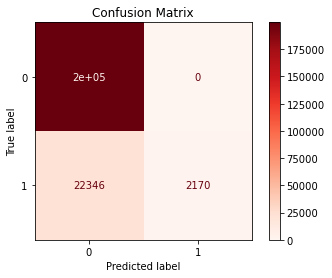

In [25]:
fig = plot_confusion_matrix(rfc, X_test, y_test, display_labels=[0,1], cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

The precision-recall curve, a computation of the precision (the ratio of actual trues divided by the sum of all values identified as true, actual or not) against the recall (the ratio of actual true values divided by the sum of actual true values, regardless of whether they are correctly identified or not) for a classifier given different thresholds. A shape like the one shown below, gives the impression of the classifier being 'perfect', as it has been able to score perfect precision and recall at every threshold. This is far from perfect. With imbalaced datasets, the precision recall curve captures well what's going on with the classification model, as [Soledad Galli demonstrates here.](https://github.com/solegalli/machine-learning-imbalanced-data/blob/master/Section-03-Metrics/03-08-Optional-Comparison-ROC-PRC.ipynb)

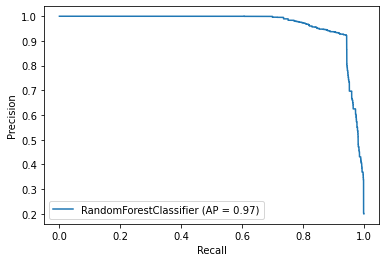

In [26]:
plot_precision_recall_curve(rfc, X_train, y_train)

#### Random Forest Classification (for Outcome variable)

With the results for a binary class in mind, let's see what happens with a multi-label variable, the outcome for each reported case.

In [27]:
# define the input and target variables
# while I think it holds some value, I am going to leave geogrpahy and chronology out of the question
# Majority and minority classes are defined by the order in which Outcome was encoded

X = df.drop(columns = ['Reported Date', 'Episode Date', 'FSA', 'Neighbourhood Name', 'Outcome', 'Age Unknown', 'Gender Unknown', 'Gender Not Listed: Please Specify', 'Currently Hospitalized', 'Currently Intubated', 'Currently in ICU', 'Ever Hospitalized', 'Ever Intubated', 'Ever in ICU'], axis=1)
y = df['Outcome']

In [28]:
# create train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.25, random_state = 20)
X_test.shape, y_test.shape

((224184, 28), (224184,))

In [29]:
# Create a baseline model that will only be able to tell the majority class, never the minority one
y_train_baseline = pd.Series(np.zeros(len(y_train)))
y_test_baseline = pd.Series(np.zeros(len(y_test)))

In [ ]:
# create random forest model
rfc= RandomForestClassifier(n_estimators=1000, random_state=39, max_depth=2, n_jobs=4)
model_fit = rfc.fit(X_train, y_train)
y_train_rfc= rfc.predict(X_train)
y_test_rfc = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_baseline, labels = [1,2,3]))

The model only does a good job when telling which class is the majority one, but data seems so imbalanced that there is no score whatsoever for the minority classes.

In [ ]:
print(classification_report(y_test, y_test_rfc, labels = [1,2,3]))

In [ ]:
fig = plot_confusion_matrix(rfc, X_test, y_test, display_labels=[1,2,3], cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

#### Dealing with Imbalanced Data

What are the ways we can make the classifier better in capturing the target variables? One way of going about it is to [undersample the majority class](https://imbalanced-learn.org/stable/references/under_sampling.html) until we reach an equal proportion of observations for any of the labels. 

##### Undersampling the Classification Model for the 'Outbreak Associated' Variable

###### Random Undersampling

In [ ]:
# instantiate random undersampler
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=29, replacement='True')

In [ ]:
# resample X and Y variables for this model
# initial run of rus triggered
# 'Only the Series name can be used for the key in Series dtype mappings.' error
# so I am passing X as an array and I am making Y a continuous one
# check https://stackoverflow.com/questions/65311823/getting-error-keyerror-only-the-series-name-can-be-used-for-the-key-in-series
X = df.drop(columns = ['Reported Date', 'Episode Date', 'FSA', 'Neighbourhood Name', 'Outbreak Associated', 'Age Unknown', 'Gender Unknown', 'Gender Not Listed: Please Specify', 'Currently Hospitalized', 'Currently Intubated', 'Currently in ICU', 'Ever Hospitalized', 'Ever Intubated', 'Ever in ICU'], axis=1)
y = df['Outbreak Associated']

In [ ]:
X_undersampled, y_undersampled = rus.fit_resample(X, y.ravel())

In [ ]:
X_undersampled.shape, y_undersampled.shape

Both the inputs and target are now resampled and aligned. Let's apply the machine learning algorithm again and assess its performance.

In [ ]:
# create train / test split
X_undersampled_train, X_undersampled_test, y_undersampled_train, y_undersampled_test = train_test_split(X_undersampled, y_undersampled, train_size = 0.25, random_state = 34)
X_undersampled_test.shape, y_undersampled_test.shape

In [ ]:
rfc = RandomForestClassifier(n_estimators=2000, max_depth=4, n_jobs=2, random_state=45)
model = rfc.fit(X_undersampled_train, y_undersampled_train)
y_undersampled_train_pred = model.predict(X_undersampled_train)
y_undersampled_test_pred = model.predict(X_undersampled_test)

In [ ]:
print(classification_report(y_undersampled_test, y_undersampled_test_pred, labels=[0,1]))

Scores just skyrocketed all across the board. Unlike the case for imbalanced data, in which I used the precision-recall plot, now I am going to call the ROC-AUC plot to see how well this randomly undersampled model is able to tell both classes.

In [ ]:
plot_roc_curve(rfc, X_undersampled_train, y_undersampled_train)

All across thresholds, this models is going to be able to be fully precise and sensible (recall). This is almost too good. An undersampled model in this case is an overfitted one? Would other methods provide different results?

Now that the minority class has been balanced, it makes sense to use the ROC-AUC score.

In [ ]:
roc_auc_score(y_undersampled_test, y_undersampled_test_pred)

###### Random Undersampling with Tomek's Links

With Tomek's Links, the resampling is computed to remove all the boundary/noisy instances between labels.

In [ ]:
tl= TomekLinks(sampling_strategy='auto', n_jobs=4)

In [ ]:
X_undersampled_tl, y_undersampled_tl = tl.fit_resample(X, y.ravel())
X_undersampled_train, X_undersampled_test, y_undersampled_train, y_undersampled_test = train_test_split(X_undersampled, y_undersampled, train_size = 0.25, random_state = 20)
X_undersampled_train.shape, y_undersampled_train.shape

In [ ]:
rfc = RandomForestClassifier(n_estimators=2000, max_depth=4, n_jobs=2, random_state=37)
model = rfc.fit(X_undersampled_train, y_undersampled_train)
y_undersampled_pred_tl = rfc.predict(X_undersampled_test)

In [ ]:
print(classification_report(y_undersampled_test, y_undersampled_pred_tl, labels=[0,1]))

The ROC-AUC score resulting from this type of undersampling is also in the realm of excellency.

In [ ]:
roc_auc_score(y_undersampled_test, y_undersampled_pred_tl)

##### Undersampling the Classification Model for the 'Outcome' Variable

For this variable, given that it contains three labels, I will forfeit the random undersampling method and use instead Tomek's Links.

In [ ]:
# instantiate Tomek Links undersampler
tl= TomekLinks(sampling_strategy='auto', n_jobs=4)

In [ ]:
X = df.drop(columns = ['Reported Date', 'Episode Date', 'FSA', 'Neighbourhood Name', 'Outcome', 'Age Unknown', 'Gender Unknown', 'Gender Not Listed: Please Specify', 'Currently Hospitalized', 'Currently Intubated', 'Currently in ICU', 'Ever Hospitalized', 'Ever Intubated', 'Ever in ICU'], axis=1)
y = df['Outcome']

In [ ]:
X_undersampled_tl, y_undersampled_tl = tl.fit_resample(X, y.ravel())
X_undersampled_train, X_undersampled_test, y_undersampled_train, y_undersampled_test = train_test_split(X_undersampled, y_undersampled, train_size = 0.25, random_state = 20)
X_undersampled_train.shape, y_undersampled_train.shape

In [ ]:
rfc = RandomForestClassifier(n_estimators=2000, max_depth=4, n_jobs=2, random_state=37)
model = rfc.fit(X_undersampled_train, y_undersampled_train)
y_undersampled_pred_tl = rfc.predict(X_undersampled_test)

In [ ]:
print(classification_report(y_undersampled_test, y_undersampled_pred_tl, labels=[0,1]))

### Classifying Cases Given Source Neighborhood Name

Can cases, be them confirmed or probable, explained by the neighborhood, the postal code and how the infection took place? Using the [Naive Bayes approach](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html), I am going to build a classifier able to distinguish between cases that are confirmed or probable by looking at the place they were reported.

In [ ]:
# bring up the copy of the df
df_nlp

As seen above, I am going to use the copy I stored at the beginning of the project. The reason why I am proceeding this way is that I dont want to use encoded values for my inputs, and I just to encode my target. Let's first be reminded of the distribution of values and have that in mind should it becomes a factor. The majority class will be 'Confirmed', whereas the minority will be 'Probable.'

In [ ]:
df_nlp['Classification'].value_counts()

In [ ]:
# encode the variable
df_nlp['Classification'] = df_nlp['Classification'].map({'CONFIRMED': '0', 'PROBABLE': '1'})

There seems to be a 'NaN' value in the column for neighborhood name. Let's replace it with a generic placeholder that won't skew the text processing.

In [ ]:
df_nlp

In [ ]:
df_nlp['Neighbourhood Name'] = df_nlp['Neighbourhood Name'].replace(np.nan, 'Unknown')

In [ ]:
# define now the input and target variables
# define train and test splits
X = df_nlp['Neighbourhood Name']
y = df_nlp['Classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1600, test_size = 0.30)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

Now that the target is encoded, I need to process my categorial, textual data. For that, I will turn the vectors of words that make each text string of the variables I have chosen as inputs into bags-of-words (a count of the occurrence of each word).
To that end, I will use [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

In [ ]:
wordbag = text.CountVectorizer(stop_words='english')

In [ ]:
# vectorize the training and test sets
X_train = wordbag.fit_transform(X_train)
X_test = wordbag.transform(X_test)

Let's build the model.

In [ ]:
# instantiate the model
nbm = MultinomialNB()
nbm.fit(X_train, y_train)

In [ ]:
y_pred = nbm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))